<a href="https://colab.research.google.com/github/Irungu-John/ECG-Signal-processing/blob/main/COVID_ECG_Signal_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive    #mounting to google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Imports

In [ ]:
# !pip -qq install tflite-model-maker

In [ ]:
## @title Import Time Series Feature Extraction Library {form-width: "15%"}

import warnings
warnings.filterwarnings('ignore')
!pip install tsfel >/dev/null 2>&1
from sys import platform

# if platform == "linux" or platform == "linux2":
#     !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip >/dev/null 2>&1
# else:
#     !pip install wget >/dev/null 2>&1
#     import wget
#     wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI HAR Dataset.zip')

In [ ]:
!pip install shap #Shapley for Model Explanation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.4 MB/s eta 0:00:00


In [ ]:
 ! pip -qq install tsfel   # instal tsfel-time series feature extraction library

In [ ]:
# pip install ECG-featurizer

In [ ]:
 !pip -q install plotly

In [ ]:
 #pip install matplotlib==3.1.3 # ALREADY INCLUDED IN COLAB

In [ ]:
# !pip uninstall numpy

In [ ]:
# !pip install numpy==1.24

In [ ]:
# importing libraries and classifiers

# import os

import numpy as np
import pandas as pd
import seaborn as sns

# import tensorflow as tf
# assert tf.__version__.startswith('2')

# # from tflite_model_maker import model_spec
# from tflite_model_maker import image_classifier
# from tflite_model_maker.config import ExportFormat
# from tflite_model_maker.config import QuantizationConfig
# from tflite_model_maker.image_classifier import DataLoader


In [ ]:
#import numpy.core.multiarray

In [ ]:

from sklearn.feature_selection import VarianceThreshold
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from scipy import signal
from scipy.signal import butter, iirnotch, lfilter

import glob
import numpy as np

import re
import tsfel

import matplotlib.pyplot as plt

In [ ]:
# # How i imported the dat files into a list


# import re
# import tsfel
 #import pandas as pd

# # Import individual files from folder

# covid_path =r'/content/drive/MyDrive/rand_data/COVID (1)'
#covid_filenames = glob.glob(covid_path + "/*.dat")

#covid_1=[]
#for filename in covid_filenames:
  # df_col_name=covid_filenames[33:-8]

#(pd.read_csv(filename ,header=None ,names=df_col_name))


# Import Data

In [ ]:
## How i imported the dat files into a list
# Import individual files from folder

'''John's file path'''
covid_path =r'/content/drive/MyDrive/COVID (1)'
normal_path = r'/content/drive/MyDrive/Normal (1)'

covid_filenames = glob.glob(covid_path + "/*.dat")
normal_filenames = glob.glob(normal_path + "/*.dat")

covid_l=[]
normal_l=[]

for filename in covid_filenames:
   df_col_name = filename[33:-8]
   df_col_num = int(re.findall(r'\d+', df_col_name)[0])
   net_df = pd.read_csv(filename, header=None)
   net_df.columns = [df_col_num]
   covid_l.append(net_df)

for filename in normal_filenames:
   df_col_name = filename[34:-8]
   df_col_num = int(re.findall(r'\d+', df_col_name)[0])
   net_df = pd.read_csv(filename, header=None)
   net_df.columns = [df_col_num]
   normal_l.append(net_df)



In [ ]:
# Image_array = np.loadtxt('/content/Normal1 (1).dat')

# plt.plot(Image_array)
# plt.show()

In [ ]:
# net2.iloc[:,0:12].plot(subplots=True, figsize=(30,20), sharey=True, sharex=False, layout=(-1,4), grid=True)
# plt.show()

# Data Preprocessing

In [ ]:
# concatenate list of dat files into one dataframe

net1 = pd.concat(covid_l,axis=1)
display(net1)
net11 = pd.concat(normal_l,axis=1)
display(net11)

99      102     100     101     94      93      82      80      77   \
0     0.0966  0.1449  0.8694 -0.0966  0.5313  0.0483  2.4150 -0.3864  0.6762   
1     0.0483  0.2415  0.8694 -0.1932  0.5796  0.0966  2.4150 -0.3864  0.6762   
2     0.0000  0.2898  0.8694 -0.2415  0.6279  0.1449  2.0286 -0.3864  0.6762   
3     0.0000  0.2415  0.8211 -0.2898  0.5796  0.1932  1.9803 -0.3864  0.6762   
4     0.0000  0.2898  0.8211 -0.2898  0.6279  0.1449  1.8837 -0.3864  0.6279   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1841  0.5796  0.2898  0.3864  0.6762     NaN     NaN     NaN     NaN     NaN   
1842  0.6762  0.3864  0.4830  0.7728     NaN     NaN     NaN     NaN     NaN   
1843     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1844     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1845     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         83   ...     113     112     15      118     104      119      121  \
0    -0.0483  ...  0.0000  0.8211  0.6279  1.1592  0.2898   0.8211   1.0143   
1    -0.0966  ...  0.0483  0.8211  0.6279  1.0143  0.2415   0.7245   1.0626   
2    -0.0483  ...  0.0966  0.8694  0.6279  0.9177  0.1932   0.6762   1.0626   
3    -0.0483  ...  0.1449  0.8694  0.6279  0.8211  0.1932   0.6279   1.1109   
4    -0.0483  ...  0.0966  0.9177  0.6279  0.7728  0.1932   0.5796   1.0626   
...      ...  ...     ...     ...     ...     ...     ...      ...      ...   
1841     NaN  ... -1.4007 -0.5313     NaN -6.0375  0.0000  -6.8103   0.5313   
1842     NaN  ... -1.4973 -0.2415     NaN -6.1341  0.0966  -6.9069   0.4347   
1843     NaN  ... -0.7728 -0.1449     NaN -6.2307     NaN  -7.0035  -6.8103   
1844     NaN  ...     NaN     NaN     NaN -9.8532     NaN -10.6260 -10.4330   
1845     NaN  ...     NaN     NaN     NaN -9.8049     NaN -10.5780 -10.3850   

          125     10      111  
0      0.2898  1.4007  0.4830  
1      0.1932  1.3041  0.5313  
2      0.0966  1.2558  0.3864  
3      0.0483  1.1592  0.3381  
4      0.0966  1.0626  0.2898  
...       ...     ...     ...  
1841   0.3381     NaN -0.5313  
1842   0.2415     NaN -0.2415  
1843  -7.0035     NaN -0.1449  
1844 -10.6260     NaN     NaN  
1845 -10.5780     NaN     NaN  

[1846 rows x 139 columns]

97      63      89      51      53      99      64      77      96   \
0   -3.7674 -0.0966  0.3381  1.3524  1.1109  0.7728  0.0000  1.6905 -0.4347   
1   -3.8157 -0.1449  0.2898  2.4633  0.9177  0.4830  0.0483  1.6422 -0.4347   
2   -2.3667 -0.0966  0.8694  3.7674  0.7245  0.3381  0.0966  1.5456 -0.4347   
3   -1.6422 -0.0966  1.1109  3.8157  0.5313  0.2898  0.1449  1.4490 -1.5456   
4   -1.1109 -1.6422  1.1592  3.0912  0.4347  0.1449  0.1932 -1.5939 -1.4973   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
496  0.3381 -0.0966  0.1932 -0.1449 -0.4347  1.0626  0.7245 -0.1449  0.4830   
497  0.2898  0.5313  0.6279 -0.0966 -0.3381  1.0143  0.7245 -0.2898  0.4347   
498  0.2415  0.5796 -0.5313  0.5313 -0.1932  0.4347  0.7728 -0.4830  0.3864   
499 -0.0483  0.0000  0.0000  3.5259  0.0000  0.1449  0.1932  0.0483  0.0966   
500     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

        76   ...     106     110     120     121     10      103     262  \
0    2.6565  ...  1.6422  0.2898 -0.0966  0.4347  0.2898  0.3381  0.3381   
1    3.0429  ...  1.5939  0.3381 -0.0483  0.4830  0.2415  0.3864  0.2898   
2    2.7531  ...  1.5456  0.3864 -0.0966  0.5313  0.2898  0.3381  0.3381   
3    0.8211  ...  1.4973  0.4830 -0.0966 -1.4973  0.2898  0.3381  0.3381   
4   -0.5313  ...  1.4490  0.5313 -1.5456 -1.4490 -1.6422 -1.6905 -1.4007   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
496 -0.1932  ...  0.0000  0.0000  1.9803  2.0286  1.5939 -0.1449 -0.0966   
497 -0.3381  ...  0.9660  0.8694  0.9660  1.0143  2.3184  0.8211  0.1932   
498 -0.5313  ...  0.3864  0.2898  0.3864  0.4347  3.1395  0.2415  0.8211   
499  0.0000  ...  0.0966  0.0000  0.0966  0.1449  3.4776 -0.0483  1.7388   
500     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2.9463   

        131     116     108  
0    1.1592  0.5796 -2.5116  
1    1.0626  0.6279 -4.7334  
2    0.9177  0.6279 -4.7817  
3    0.8694  0.6762 -2.8497  
4    0.7245  0.7245 -2.6082  
..      ...     ...     ...  
496 -0.5796  0.0966 -0.0483  
497  0.8694  0.8694  0.8211  
498  0.2898  0.2898  0.2415  
499  0.0000  0.0000 -0.0483  
500     NaN     NaN     NaN  

[501 rows x 276 columns]

In [ ]:
# check the shape of covid and normal dataframe

net1.shape, net11.shape

((1846, 139), (501, 276))

In [ ]:
#sorting out the columns

net2 = net1.copy()[sorted(net1.copy())]
display(net2)

net22 = net11.copy()[sorted(net11.copy())]
display(net22)

1       2       3       4       5       6       7       8    9    \
0     4.5402 -0.0483  0.0000  0.8211  1.7871 -0.4830  2.3184 -0.1449  0.0   
1     4.4919 -0.0483  0.0000  0.8211  1.6905 -0.5313  2.3184 -0.1449  0.0   
2     4.3953 -0.0483 -0.0483  0.9177  1.7388 -0.4830  2.3184 -0.1932  0.0   
3     4.3953 -0.0483  0.0000  1.0143  1.6905 -0.4830  2.3184 -0.1932  0.0   
4     0.0000 -0.0483 -0.0483  1.9803  1.6422 -0.4830  2.3184 -0.1932  0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...  ...   
1841     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN   
1842     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN   
1843     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN   
1844     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN   
1845     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN   

         10   ...      130      131     132      133      134      135  \
0     1.4007  ...  -0.9660  -3.0429  0.3864  -0.8694  -0.0483   0.4347   
1     1.3041  ...  -1.0626  -3.1878  0.3864  -0.7728  -0.0483   0.2898   
2     1.2558  ...  -1.1109  -3.2844  0.3864  -0.7245  -0.0483   0.1932   
3     1.1592  ...  -1.1592  -3.3327  0.3864  -0.6279  -0.0483   0.1932   
4     1.0626  ...  -1.1109  -3.3810  0.3381  -0.6279  -0.0483   0.1449   
...      ...  ...      ...      ...     ...      ...      ...      ...   
1841     NaN  ...   7.9695   8.5008  9.2253   8.0661   8.2593   8.0661   
1842     NaN  ...   7.8246   8.3559  9.0804   7.9212   8.1144   7.9212   
1843     NaN  ...  -7.2450  -6.7137 -5.9892  -7.1484  -6.9552  -7.1484   
1844     NaN  ... -10.8670 -10.3360 -9.6117 -10.7710 -10.5780 -10.7710   
1845     NaN  ... -10.8190 -10.2880 -9.5634 -10.7230 -10.5290 -10.7230   

          136      137      138     154  
0     -0.5796   0.3864  -0.2898 -0.0966  
1     -0.6279   0.3381  -0.2898 -0.6279  
2     -0.6762   0.3864  -0.3381 -0.1932  
3     -0.7245   0.3864  -0.3381 -0.0966  
4     -0.7245   0.3864  -0.3381  1.3041  
...       ...      ...      ...     ...  
1841   8.0661   2.4150   2.0286     NaN  
1842   7.9212   8.4525   8.0661     NaN  
1843  -7.1484  -6.6171  -7.0035     NaN  
1844 -10.7710 -10.2400 -10.6260     NaN  
1845 -10.7230 -10.1910 -10.5780     NaN  

[1846 rows x 139 columns]

1       2       3        4       5       6       7       8       9    \
0    0.0000  0.1932  0.0483  0.07245  1.0143  0.1932  2.2218  0.1932  0.0483   
1    0.3864  0.2415  0.0000  0.02415  0.0000  0.0966  2.3184  0.1449  0.0966   
2    0.8694  0.2898  0.0483 -0.02415 -0.0966  0.0483  2.3667  0.1932  0.0966   
3    0.9177  0.3381  0.0483 -0.02415 -0.2898  0.0000  2.4150  0.1932 -1.6422   
4    1.2075  0.3864 -1.6905 -0.02415 -0.1932  0.0000  2.4150 -1.5456 -1.5939   
..      ...     ...     ...      ...     ...     ...     ...     ...     ...   
496     NaN     NaN     NaN      NaN  0.0000  2.1735  1.7388  1.6905  1.5939   
497     NaN     NaN     NaN      NaN     NaN  2.8980  2.4633  2.4150  2.3184   
498     NaN     NaN     NaN      NaN     NaN  3.7191  3.2844  3.2361  3.1395   
499     NaN     NaN     NaN      NaN     NaN  4.0572  3.6225  3.5742  3.4776   
500     NaN     NaN     NaN      NaN     NaN     NaN     NaN     NaN     NaN   

        10   ...     267     268     269     270     271     272     273  \
0    0.2898  ...  0.4830 -0.1932  0.0966  0.0966  2.2218  0.0966  0.0966   
1    0.2415  ... -0.6279 -0.0966  0.0483  0.0966  1.6422  0.0483  0.0483   
2    0.2898  ... -0.7245  0.0000  0.0483  0.0966  1.4007  0.0000  0.0483   
3    0.2898  ... -1.0143  0.0966 -1.5939  0.0966  1.1592  0.0000  0.0483   
4   -1.6422  ... -0.8211  0.1932 -1.5456 -1.4490  0.8694 -1.3524 -1.4490   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
496  1.5939  ...  0.0483 -0.0483  0.1449  0.2898  0.1449  0.3864  0.2898   
497  2.3184  ... -0.0966 -0.1932  0.0000  0.1449  0.0000  0.2415  0.1449   
498  3.1395  ...  0.5313  0.4347  0.6279  0.7728  0.6279  0.8694  0.7728   
499  3.4776  ...  1.4490  1.3524  1.5456  1.6905  1.5456  1.7871  1.6905   
500     NaN  ...  2.6565  2.5599  2.7531  2.8980  2.7531  2.9946  2.8980   

        274     275     276  
0    0.6279  0.2415  0.4830  
1    0.6762  0.3864  0.5313  
2    0.6762  0.9177  0.5796  
3   -1.6422  0.9660  0.5796  
4   -1.5939  0.4347  0.5796  
..      ...     ...     ...  
496  0.0966 -0.2898 -0.2898  
497 -0.0483  0.0483  0.0483  
498  0.5796  0.6762  0.6762  
499  1.4973  1.5939  1.5939  
500  2.7048  2.8014  2.8014  

[501 rows x 276 columns]

## Plot of ECG data

In [ ]:
# To setup ECG plots

import plotly.express as px
import ipywidgets as widgets

cov_df = net2.copy().melt(var_name='ECG number', value_name='Covid ECG')
nor_df = net22.copy().melt(var_name='ECG number', value_name='Normal ECG')

In [ ]:
fig = px.line(
    nor_df,
    y='Normal ECG',

)
fig.show()

In [ ]:
cov_df

ECG number  Covid ECG
0                1     4.5402
1                1     4.4919
2                1     4.3953
3                1     4.3953
4                1     0.0000
...            ...        ...
256589         154        NaN
256590         154        NaN
256591         154        NaN
256592         154        NaN
256593         154        NaN

[256594 rows x 2 columns]

In [ ]:
nor_df.isna().sum()

ECG number      0
Normal ECG    277
dtype: int64

## Data Wrangling

<Axes: >

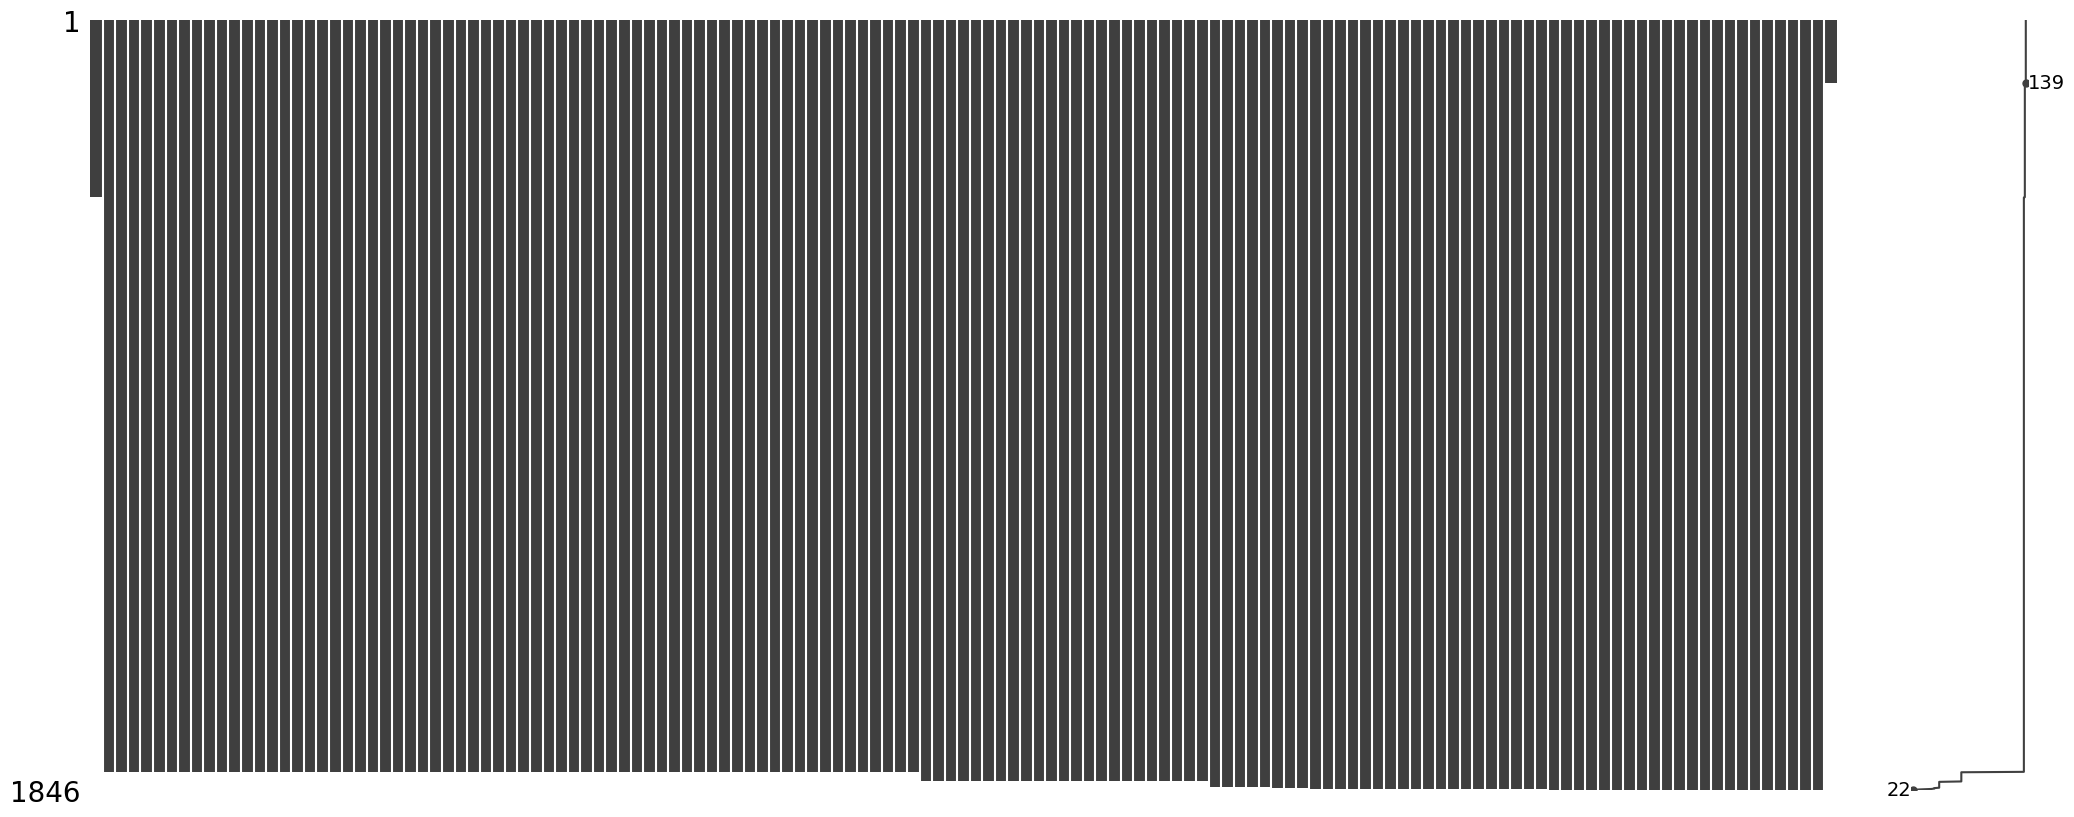

In [ ]:
# Visualize Nan

import missingno
missingno.matrix(net2)
# missingno.matrix(net2.iloc[:,1:-1])

<Axes: >

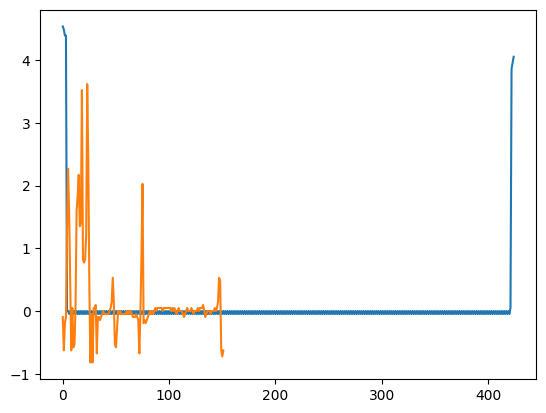

In [ ]:
# plot of first (blue) and last (orange) covid dataset

net2.iloc[:,0].plot()
net2.iloc[:,-1].plot()

In [ ]:
# remove covid data from column 1

net2_ = net2.iloc[:, 1:]
net2_

2       3       4       5       6       7       8    9       10   \
0    -0.0483  0.0000  0.8211  1.7871 -0.4830  2.3184 -0.1449  0.0  1.4007   
1    -0.0483  0.0000  0.8211  1.6905 -0.5313  2.3184 -0.1449  0.0  1.3041   
2    -0.0483 -0.0483  0.9177  1.7388 -0.4830  2.3184 -0.1932  0.0  1.2558   
3    -0.0483  0.0000  1.0143  1.6905 -0.4830  2.3184 -0.1932  0.0  1.1592   
4    -0.0483 -0.0483  1.9803  1.6422 -0.4830  2.3184 -0.1932  0.0  1.0626   
...      ...     ...     ...     ...     ...     ...     ...  ...     ...   
1841     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN     NaN   
1842     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN     NaN   
1843     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN     NaN   
1844     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN     NaN   
1845     NaN     NaN     NaN     NaN     NaN     NaN     NaN  NaN     NaN   

      11   ...      130      131     132      133      134      135      136  \
0     0.0  ...  -0.9660  -3.0429  0.3864  -0.8694  -0.0483   0.4347  -0.5796   
1     0.0  ...  -1.0626  -3.1878  0.3864  -0.7728  -0.0483   0.2898  -0.6279   
2     0.0  ...  -1.1109  -3.2844  0.3864  -0.7245  -0.0483   0.1932  -0.6762   
3     0.0  ...  -1.1592  -3.3327  0.3864  -0.6279  -0.0483   0.1932  -0.7245   
4     0.0  ...  -1.1109  -3.3810  0.3381  -0.6279  -0.0483   0.1449  -0.7245   
...   ...  ...      ...      ...     ...      ...      ...      ...      ...   
1841  NaN  ...   7.9695   8.5008  9.2253   8.0661   8.2593   8.0661   8.0661   
1842  NaN  ...   7.8246   8.3559  9.0804   7.9212   8.1144   7.9212   7.9212   
1843  NaN  ...  -7.2450  -6.7137 -5.9892  -7.1484  -6.9552  -7.1484  -7.1484   
1844  NaN  ... -10.8670 -10.3360 -9.6117 -10.7710 -10.5780 -10.7710 -10.7710   
1845  NaN  ... -10.8190 -10.2880 -9.5634 -10.7230 -10.5290 -10.7230 -10.7230   

          137      138     154  
0      0.3864  -0.2898 -0.0966  
1      0.3381  -0.2898 -0.6279  
2      0.3864  -0.3381 -0.1932  
3      0.3864  -0.3381 -0.0966  
4      0.3864  -0.3381  1.3041  
...       ...      ...     ...  
1841   2.4150   2.0286     NaN  
1842   8.4525   8.0661     NaN  
1843  -6.6171  -7.0035     NaN  
1844 -10.2400 -10.6260     NaN  
1845 -10.1910 -10.5780     NaN  

[1846 rows x 138 columns]

<Axes: >

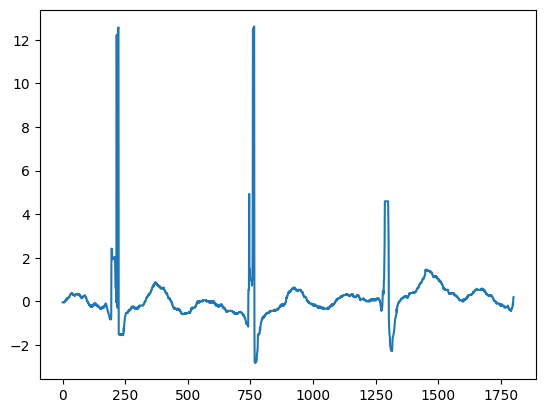

In [ ]:
net2_.iloc[:, 0].plot()

In [ ]:
#  Remove nans from covid

tem_l = [net2_.copy().loc[:,i].dropna().values for i in net2_.columns]
tem_l
# .loc[:, 1]

[array([-0.0483, -0.0483, -0.0483, ..., -0.1449,  0.1449,  0.1932]),
 array([ 0.    ,  0.    , -0.0483, ..., -0.1449,  0.1449,  0.1932]),
 array([ 0.8211,  0.8211,  0.9177, ..., -0.6762, -0.3864, -0.3381]),
 array([ 1.7871,  1.6905,  1.7388, ..., -0.3864, -0.0966, -0.0483]),
 array([-0.483 , -0.5313, -0.483 , ..., -0.9177, -0.6279, -0.5796]),
 array([ 2.3184,  2.3184,  2.3184, ..., -0.7728, -0.483 , -0.4347]),
 array([-0.1449, -0.1449, -0.1932, ..., -0.6762, -0.3864, -0.3381]),
 array([ 0.    ,  0.    ,  0.    , ..., -0.3381, -0.0483,  0.    ]),
 array([ 1.4007,  1.3041,  1.2558, ..., -0.2415,  0.0483,  0.0966]),
 array([ 0.    ,  0.    ,  0.    , ..., -0.483 , -0.1932, -0.1449]),
 array([ 0.    , -0.0966, -0.1449, ..., -1.1592, -0.8694, -0.8211]),
 array([ 3.0429,  3.1395,  3.4293, ..., -0.5796, -0.2898, -0.2415]),
 array([ 2.5116,  2.5116,  1.449 , ..., -0.4347, -0.1449, -0.0966]),
 array([ 0.6279,  0.6279,  0.6279, ..., -0.1932,  0.0966,  0.1449]),
 array([ 0.1449,  0.1449,  0.1449,

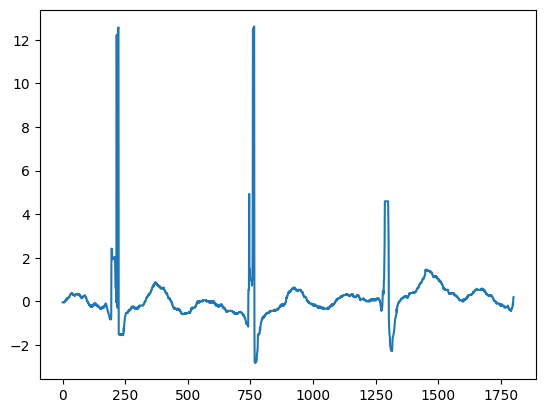

In [ ]:
plt.plot(tem_l[0])

In [ ]:
tem_ = np.concatenate(tem_l)
tem_.shape

(249620,)

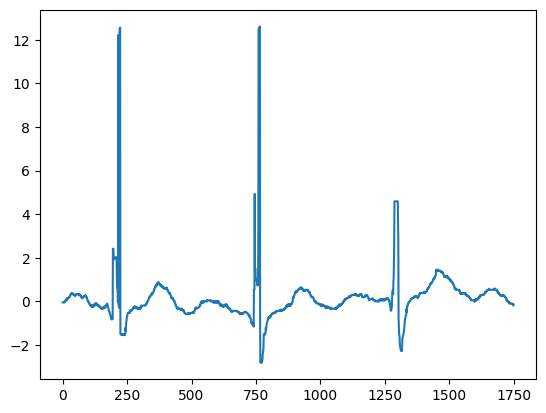

In [ ]:
plt.plot(tem_[0:1750])

<Axes: >

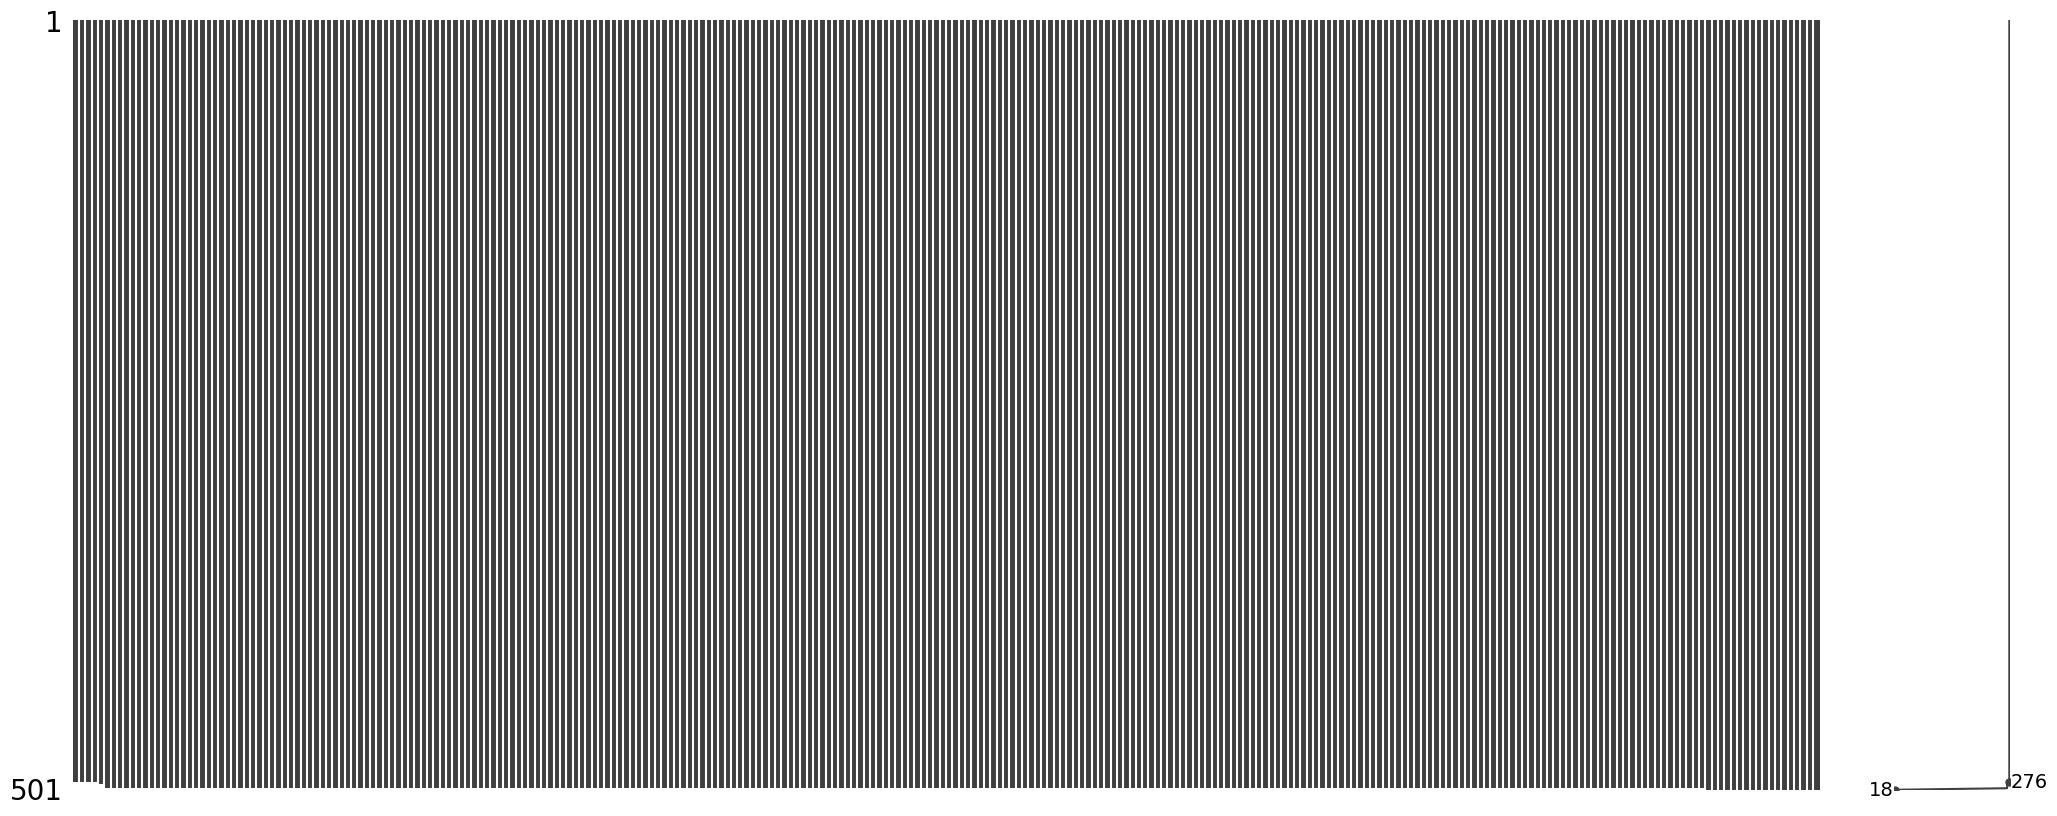

In [ ]:
missingno.matrix(net22)

In [ ]:
tem_l1 = [net22.copy().loc[:,i].dropna().values for i in net22.columns]
tem1_ = np.concatenate(tem_l1)
tem1_.shape

(137999,)

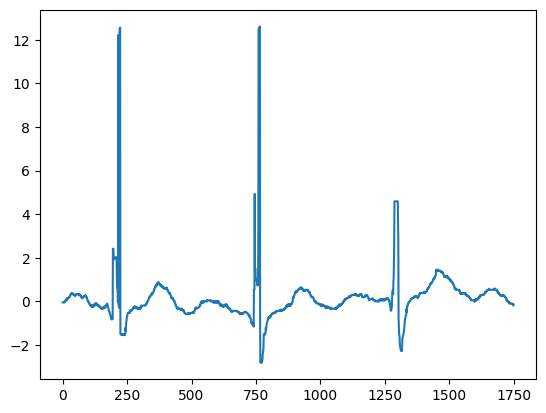

In [ ]:
covid_array= tem_
plt.plot(covid_array[0:1750])

In [ ]:
#covid_array=covid_m

In [ ]:
#covid_m[1,:]

In [ ]:
#plt.plot(covid_m[:,1])

In [ ]:
# Reduce covid and normal datasets to 249600, and 137600 respectively
# in order to have a common factor of 3200. This will be the size of the window in datapoints.

# Reduce the dataset sizes
covid_array = tem_.copy()[0:249600]
normal_array = tem1_.copy()[0:137600]

# transform data array into shape with columns = window size (3200)
# The common factors are: 1, 2, 4, 5, 8, 10, 16, 20, 25, 32, 40, 50, 64, 80, 100, 128, 160, 200, 320, 400, 640, 800, 1600, 3200

window_size = 400

covid_m = np.reshape(covid_array,(-1, window_size))
normal_m = np.reshape(normal_array,(-1, window_size))

# Convert to dataframes
covid_df = pd.DataFrame(covid_m)
normal_df = pd.DataFrame(normal_m)

# Add health labels to data
health_label = np.asarray(['Covid','Normal'])
covid_df['state'] = 'Covid'
normal_df['state'] = 'Normal'

# making the covid and normal datasets with equivalent size
szn = normal_m.shape[0]         # size of normal dataset
covid_df1 = covid_df.copy().sample(szn, random_state=12)
# covid_df1 = covid_df.copy()

print('Size of covid and normal datasets = '+str(covid_df1.shape)+str(normal_df.shape))

Size of covid and normal datasets = (344, 401)(344, 401)


In [ ]:
normal_df
# .drop(columns=['state'])

0        1        2        3        4        5        6        7  \
0    0.00000  0.38640  0.86940  0.91770  1.20750  1.11090  0.96600 -1.44900   
1    0.04830  0.04830  0.04830  0.00000 -0.04830  0.00000 -0.04830  0.00000   
2    0.96600  1.01430  0.96600  1.01430  0.96600  0.91770  0.86940  0.82110   
3   -0.14490 -0.09660 -0.04830  0.00000  0.09660  0.24150  0.38640  0.33810   
4    0.41055  0.41055  0.41055  0.41055  0.36225  0.41055  0.36225  0.31395   
..       ...      ...      ...      ...      ...      ...      ...      ...   
339  0.04830 -0.09660 -0.19320 -0.24150 -0.38640 -0.43470 -0.48300 -0.48300   
340 -1.40070  1.54560  1.54560  1.54560  1.44900  1.30410  1.20750  1.11090   
341 -0.43470 -0.38640 -0.43470 -0.38640 -0.33810 -0.38640 -0.38640 -0.38640   
342  0.62790  1.11090  1.44900  1.25580  1.15920 -0.09660 -1.01430 -1.54560   
343 -0.19320 -0.19320 -0.19320 -0.19320 -0.19320 -0.19320 -0.19320 -0.19320   

           8        9  ...      391      392      393      394      395  \
0   -1.40070  0.00000  ...  0.19320  0.19320  0.19320  0.14490  0.19320   
1   -0.04830 -0.04830  ...  0.82110  0.82110  0.82110  0.86940  0.86940   
2    0.67620  0.57960  ... -1.06260 -0.86940 -0.62790 -0.43470 -0.38640   
3    0.28980  0.28980  ...  0.21735  0.26565  0.26565  0.26565  0.31395   
4    0.36225  0.31395  ... -0.14490 -1.64220 -1.59390  1.35240  1.35240   
..       ...      ...  ...      ...      ...      ...      ...      ...   
339 -0.48300 -0.53130  ...  0.24150  0.86940  1.78710  2.99460  0.09660   
340  0.96600  0.86940  ...  3.76740  3.81570  3.38100  1.11090  0.19320   
341 -0.33810 -0.28980  ... -0.19320 -0.14490 -0.19320 -0.14490 -0.19320   
342 -1.73880 -1.83540  ... -0.09660 -0.14490 -0.19320 -0.19320 -0.19320   
343 -0.19320 -0.19320  ... -0.04830 -0.09660 -0.04830 -0.09660 -0.04830   

         396      397      398      399   state  
0    0.14490  0.19320  0.14490  0.09660  Normal  
1    0.91770  0.91770  0.96600  0.91770  Normal  
2   -0.33810 -0.24150 -0.19320 -0.14490  Normal  
3    0.36225  0.36225  0.36225  0.41055  Normal  
4    1.30410  1.25580  1.11090  1.01430  Normal  
..       ...      ...      ...      ...     ...  
339  0.04830  0.04830  0.04830 -1.44900  Normal  
340 -0.24150 -0.28980 -0.43470 -0.48300  Normal  
341 -0.14490  0.00000  0.04830  0.28980  Normal  
342 -0.24150 -0.19320 -0.24150 -0.19320  Normal  
343 -0.09660 -0.09660 -0.09660 -0.09660  Normal  

[344 rows x 401 columns]

In [ ]:
#normal_df.iloc[0,:].plot()

In [ ]:
# Combine preprocessed dataset

CovNorm_df = pd.concat([covid_df1, normal_df], ignore_index=True).sample(frac=1, random_state=7)
CovNorm_df.reset_index(drop=True, inplace=True)
CovNorm_df

# CovNorm_df = pd.concat([covid_df_m, normal_df_m], ignore_index=True).sample(frac=1, random_state=7)
# CovNorm_df.reset_index(drop=True, inplace=True)
# CovNorm_df

0       1       2       3       4       5       6       7       8  \
0    0.8211  0.9660  1.1109 -0.0966 -0.0966 -0.1449 -0.1932 -0.1449 -0.1932   
1   -0.4347 -0.4830 -0.4347 -0.4830 -0.4347 -0.4830 -0.4347 -0.4830 -0.4347   
2    0.8694  0.9660  1.0626  1.3041  1.3524  1.3041  1.2558  1.2075  1.1592   
3   -0.1449 -0.1449 -0.1449 -0.1449 -0.1449 -0.1932 -0.1932 -0.2415 -0.2415   
4    0.9660  1.0143  0.9660  1.0143  0.9660  0.9177  0.8694  0.8211  0.6762   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
683  0.9660  1.1109  1.2558  0.7245  0.7245  0.7728  0.7728  0.8211  0.8694   
684  0.0483  0.0000  0.0483  0.0000  0.0000  0.0000  0.0483  0.0483  0.0483   
685 -0.1932 -0.1449 -0.1932 -0.1449 -0.1932 -0.1449 -0.1449 -0.1449 -0.1932   
686  0.2415  0.2898  0.2415  0.2898  0.2415  0.2415  0.2415  0.2415  0.1932   
687 -0.0966 -0.0483 -0.0966 -0.0483 -0.0966 -0.1449 -0.1932 -0.2415 -0.2898   

          9  ...     391     392     393     394     395     396     397  \
0   -0.1449  ...  0.0483  0.0000 -0.0483 -0.0966 -0.0966 -0.1449 -0.1449   
1   -0.4830  ...  2.4150  2.4633  2.5116  2.5599  2.5116  2.5599  2.6082   
2    0.9660  ... -0.0966 -0.0966 -0.1449 -0.0966 -0.1449 -0.0966 -0.1449   
3   -0.2898  ...  0.8211  0.8211  0.8211  0.8211  0.8211  0.8211  0.8211   
4    0.5796  ... -1.0626 -0.8694 -0.6279 -0.4347 -0.3864 -0.3381 -0.2415   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
683  0.6279  ... -0.0483 -0.0483  0.0000  0.0000  0.0000  0.0000  0.0000   
684  0.0000  ...  1.2558  1.2558  1.2558  1.2075  1.1592  1.1109  1.0626   
685 -0.1449  ...  0.0483  0.0483  0.0483  0.0483  0.0483  0.0483  0.0483   
686  0.2415  ...  0.0966  0.0483  0.0000  0.0000 -0.0483 -0.0483 -0.0483   
687 -0.3381  ...  0.5313  0.5796  0.5796  0.6279  0.6279  0.6762  0.6279   

        398     399   state  
0   -0.1932 -0.2415  Normal  
1    2.5599  2.6082   Covid  
2   -0.0966 -0.1449  Normal  
3    0.8211  0.8211   Covid  
4   -0.1932 -0.1449  Normal  
..      ...     ...     ...  
683 -0.0483 -0.0483  Normal  
684  1.0143  0.8211  Normal  
685  0.0483  0.0483  Normal  
686 -0.0966 -0.0966   Covid  
687  0.6762  0.6279   Covid  

[688 rows x 401 columns]

In [ ]:
#correlation for all features in the dataset
#correlation_data =CovNorm_df.corr()
#print(correlation_data)

In [ ]:
#import seaborn as sns
#visulaization for correlation
#plt.figure(figsize=(10,7.5))
#sns.heatmap(correlation_data, annot=True, cmap='BrBG')

In [ ]:
CovNorm_df.to_csv('CovNorm1.csv', index_label=False)

In [ ]:
CovNorm_df.shape

(688, 401)

In [ ]:
#X_n_train

In [ ]:
# split features and labels
X, y = CovNorm_df.copy().iloc[:,0:-1].values, CovNorm_df.copy().iloc[:,-1].values
# .astype('float64')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=0.25, stratify=y)

# label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
X_train.shape ,y_train.shape ,X_test.shape, y_test.shape

((516, 400), (516,), (172, 400), (172,))

In [ ]:
#CovNorm_df.iloc[0,0:-1].plot()

In [ ]:
#import linear regression libraries
#import sklearn
#from sklearn.linear_model import LinearRegression
#lr=LinearRegression()

# Feature Extraction

In [ ]:
# Feature extraction

fs=500

cfg_file = tsfel.get_features_by_domain()
#cfg_file = tsfel.get_features_by_domain('temporal')
#cfg_file = tsfel.get_features_by_domain('spectral')
#cfg_file = tsfel.get_features_by_domain('statistical')

x_train_feat = tsfel.time_series_features_extractor(cfg_file, X_train, fs=fs)
x_test_feat = tsfel.time_series_features_extractor(cfg_file, X_test, fs=fs)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [ ]:
x_test_feat

0_Absolute energy  0_Area under the curve  0_Autocorrelation  \
0         269.302406                0.166152         269.302406   

   0_Average power  0_Centroid  0_ECDF Percentile Count_0  \
0       787.433936    0.184193                       34.0   

   0_ECDF Percentile Count_1  0_ECDF Percentile_0  0_ECDF Percentile_1  \
0                      137.0              -0.2415               0.5796   

   0_ECDF_0  ...  9_Wavelet variance_0  9_Wavelet variance_1  \
0  0.005814  ...              1.286957              1.498997   

   9_Wavelet variance_2  9_Wavelet variance_3  9_Wavelet variance_4  \
0               1.37479              1.200431              0.945995   

   9_Wavelet variance_5  9_Wavelet variance_6  9_Wavelet variance_7  \
0              0.828637              0.838656              0.896903   

   9_Wavelet variance_8  9_Zero crossing rate  
0              0.948212                 103.0  

[1 rows x 88000 columns]

In [ ]:
x_train_feat

0_Absolute energy  0_Area under the curve  0_Autocorrelation  \
0          801.77124                0.488217          801.77124   

   0_Average power  0_Centroid  0_ECDF Percentile Count_0  \
0       778.418679    0.537813                      103.0   

   0_ECDF Percentile Count_1  0_ECDF Percentile_0  0_ECDF Percentile_1  \
0                      412.0              -0.1932               0.5796   

   0_ECDF_0  ...  9_Wavelet variance_0  9_Wavelet variance_1  \
0  0.001938  ...              1.384926              1.480474   

   9_Wavelet variance_2  9_Wavelet variance_3  9_Wavelet variance_4  \
0              1.571935              1.609797              1.538205   

   9_Wavelet variance_5  9_Wavelet variance_6  9_Wavelet variance_7  \
0              1.463079              1.435635              1.419882   

   9_Wavelet variance_8  9_Zero crossing rate  
0              1.383739                 300.0  

[1 rows x 155600 columns]

In [ ]:
cfg_file #Features

{'spectral': {'FFT mean coefficient': {'complexity': 'constant',
   'description': 'Computes the mean value of each spectrogram frequency.',
   'function': 'tsfel.fft_mean_coeff',
   'parameters': {'fs': 500, 'nfreq': 256},
   'n_features': 'nfreq',
   'use': 'yes'},
  'Fundamental frequency': {'complexity': 'log',
   'description': 'Computes the fundamental frequency.',
   'function': 'tsfel.fundamental_frequency',
   'parameters': {'fs': 500},
   'n_features': 1,
   'use': 'yes'},
  'Human range energy': {'complexity': 'log',
   'description': 'Computes the human range energy ratio given by the ratio between the energy in frequency 0.6-2.5Hz and the whole energy band.',
   'function': 'tsfel.human_range_energy',
   'parameters': {'fs': 500},
   'n_features': 1,
   'use': 'yes',
   'tag': 'inertial'},
  'LPCC': {'complexity': 'log',
   'description': 'Computes the linear prediction cepstral coefficients.',
   'function': 'tsfel.lpcc',
   'parameters': {'n_coeff': 12},
   'n_features':

# Feature selction

In [ ]:
x_train_feat.columns.shape

(155600,)

In [ ]:
x_test_feat.columns.shape

(88000,)

In [ ]:
# Highly correlated features are removed
corr_features = tsfel.correlated_features(x_train_feat)
x_train_feat.drop(corr_features, axis=1, inplace=True)
x_test_feat.drop(corr_features, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(x_train_feat)
X_test = selector.transform(x_test_feat)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train)
nX_test = scaler.transform(X_test)

In [ ]:
corr_features

In [ ]:
x_train_feat.columns.shape

In [ ]:
list(x_train_feat.columns)

['0_Absolute energy',
 '0_Area under the curve',
 '0_Centroid',
 '0_Entropy',
 '0_Mean absolute diff',
 '0_Mean diff',
 '0_Median absolute diff',
 '0_Median diff',
 '0_Negative turning points',
 '0_Neighbourhood peaks',
 '0_Peak to peak distance',
 '0_Slope',
 '0_Zero crossing rate']

**SHAP/LIME**

In [ ]:
import shap
shap.initjs()

# Classification RandomForest

In [ ]:
# Random Forest Classifier
classifier_RF= RandomForestClassifier(random_state=7)
#classifier_RF =c()
# Train the classifier
classifier_RF.fit(nX_train, y_train.ravel())

# Predict test data
y_test_predict = classifier_RF.predict(nX_test)

# Get the classification report
accuracy = accuracy_score(y_test, y_test_predict) * 100
print(classification_report(y_test, y_test_predict, target_names=health_label))
print("Accuracy: " + str(accuracy) + '%')

              precision    recall  f1-score   support

       Covid       0.89      0.95      0.92        86
      Normal       0.95      0.88      0.92        86

    accuracy                           0.92       172
   macro avg       0.92      0.92      0.92       172
weighted avg       0.92      0.92      0.92       172

Accuracy: 91.86046511627907%


**VERSION 2**

In [ ]:
# RF Confusion Matrix

#cm = confusion_matrix(y_test_feat_, y_test_predict)
#df_cm = pd.DataFrame(cm, index=[i for i in health_label], columns=[i for i in health_label])
#plt.figure()
#ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
#plt.setp(ax.get_xticklabels(), rotation=45)

#plt.ylabel('True label', fontweight='bold', fontsize = 18)
#plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
#bottom, top = ax.get_ylim()
#plt.show()

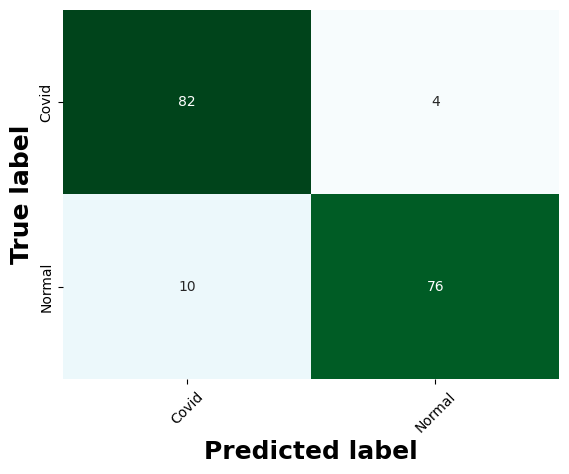

In [ ]:
# RF Confusion Matrix

cm = confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(cm, index=[i for i in health_label], columns=[i for i in health_label])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.show()

## HP-tuning

In [ ]:
import seaborn as sns

              precision    recall  f1-score   support

       Covid       0.89      0.95      0.92        86
      Normal       0.95      0.88      0.92        86

    accuracy                           0.92       172
   macro avg       0.92      0.92      0.92       172
weighted avg       0.92      0.92      0.92       172

Accuracy: 91.86046511627907%


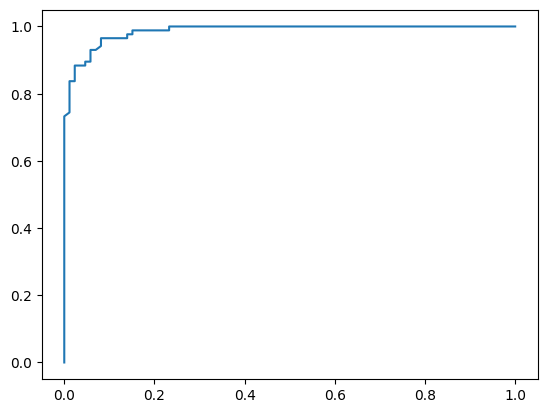

In [ ]:
# Random Forest Classifier
classifier_RF= RandomForestClassifier(random_state=7)
#classifier_RF =c()
# Train the classifier
classifier_RF.fit(nX_train, y_train)

# Predict test data
y_test_predict = classifier_RF.predict(nX_test)

# Get the classification report
accuracy = accuracy_score(y_test,  y_test_predict) * 100
print(classification_report(y_test, y_test_predict, target_names=health_label))
print("Accuracy: " + str(accuracy) + '%')

#fit Random Forest Classifier model and plot ROC curve [:,-1]
y_pred = classifier_RF.predict_proba(nX_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.show()

In [ ]:
# Standard parameters for RF

classifier_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Tune RF hyperparameters

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from pprint import pprint
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import StratifiedKFold

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [1, 2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


In [ ]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

In [ ]:
# Use the random grid to search for best hyperparameters

classifier_RF_tuned = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(
    estimator=classifier_RF_tuned, param_distributions=random_grid,
    n_iter = 100, cv = StratifiedKFold(n_splits=3), verbose=2, n_jobs=-1,
    return_train_score=True

)

# Fit the random search model
rf_random.fit(nX_train, y_train.ravel());

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
tem = rf_random.cv_results_
tem.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'param_max_depth', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

<Axes: >

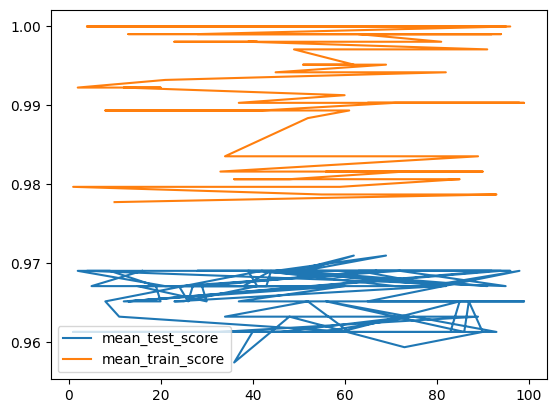

In [ ]:
scores = pd.DataFrame(rf_random.cv_results_)[['param_max_depth', 'param_max_features', 'param_n_estimators','mean_test_score', 'mean_train_score', 'rank_test_score']]
scores1 = scores.copy().sort_values(by=['mean_train_score'])
scores1
scores1[['mean_test_score','mean_train_score']].plot()

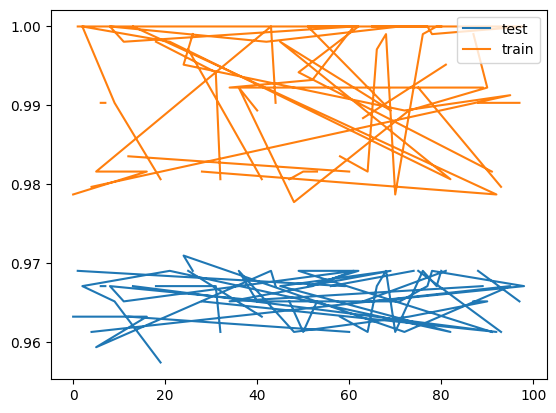

In [ ]:
test_scores=rf_random.cv_results_['mean_test_score']
train_scores =rf_random.cv_results_['mean_train_score']
x=scores1.index

plt.plot(x,test_scores, label ='test')
plt.plot(x,train_scores, label ='train')
plt.legend(loc='best')
plt.show()

In [ ]:
#test_scores


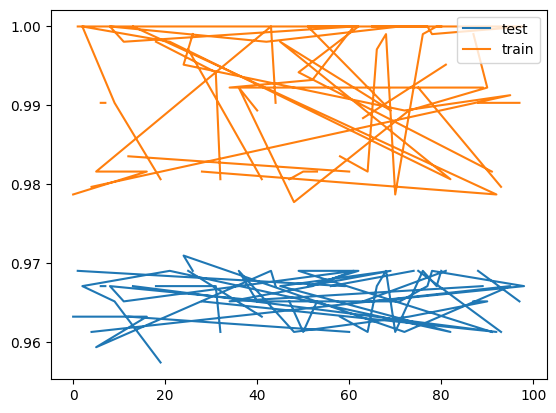

In [ ]:
test_scores = rf_random.cv_results_['mean_test_score']
train_scores = rf_random.cv_results_['mean_train_score']
x = scores1.index
# train_scores = rf_random.cv_results_['std_test_score']


plt.plot(x, test_scores, label='test')
plt.plot(x, train_scores, label='train')
plt.legend(loc='best')
plt.show()

# Classification KNN

In [ ]:
# K Nearest Neighbors (KNN) Classification

from sklearn import neighbors
n_neighbors = 15

classifier_knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
# Train the classifier
classifier_knn.fit(nX_train, y_train.ravel())

# Predict test data
y_test_predict_knn = classifier_knn.predict(nX_test)

# Get the classification report
accuracy_knn = accuracy_score(y_test, y_test_predict_knn) * 100
print(classification_report(y_test, y_test_predict_knn, target_names=health_label))
print("Accuracy: " + str(accuracy_knn) + '%')

              precision    recall  f1-score   support

       Covid       0.94      0.92      0.93        86
      Normal       0.92      0.94      0.93        86

    accuracy                           0.93       172
   macro avg       0.93      0.93      0.93       172
weighted avg       0.93      0.93      0.93       172

Accuracy: 93.02325581395348%


**KNN Classification**

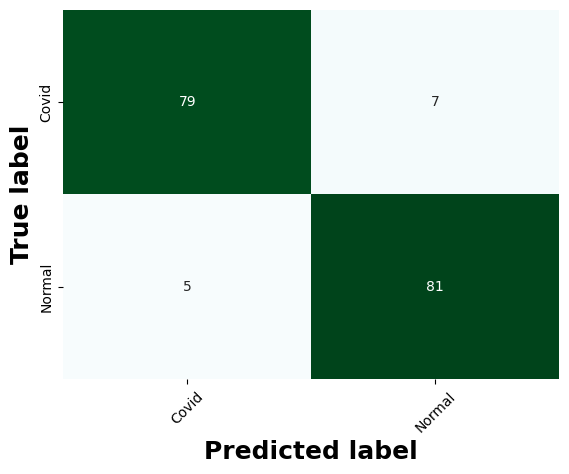

In [ ]:
# KNN Confusion Matrix

cm = confusion_matrix(y_test, y_test_predict_knn)
df_cm = pd.DataFrame(cm, index=[i for i in health_label], columns=[i for i in health_label])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.show()

**SVM Classification**

In [ ]:
# Support Vectro Machine (SVM) Classification

from sklearn import svm

classifier_svm = svm.NuSVC(gamma='auto', probability=True)

# Train the classifier
classifier_svm.fit(nX_train, y_train)

# Predict test data
y_test_predict_svm = classifier_svm.predict(nX_test)

# Get the classification report
accuracy_svm = accuracy_score(y_test, y_test_predict_svm) * 100
print(classification_report(y_test, y_test_predict_svm, target_names=health_label))
print("Accuracy: " + str(accuracy_svm) + '%')

              precision    recall  f1-score   support

       Covid       0.89      0.97      0.93        86
      Normal       0.96      0.88      0.92        86

    accuracy                           0.92       172
   macro avg       0.93      0.92      0.92       172
weighted avg       0.93      0.92      0.92       172

Accuracy: 92.44186046511628%


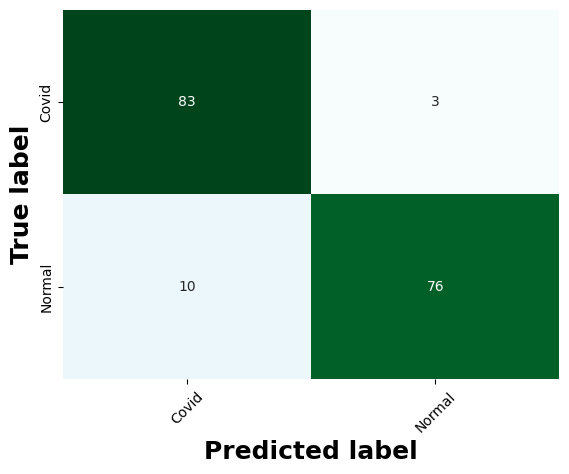

In [ ]:
# SVM Confusion Matrix

cm = confusion_matrix(y_test, y_test_predict_svm)
df_cm = pd.DataFrame(cm, index=[i for i in health_label], columns=[i for i in health_label])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.show()

**ROC Curves**

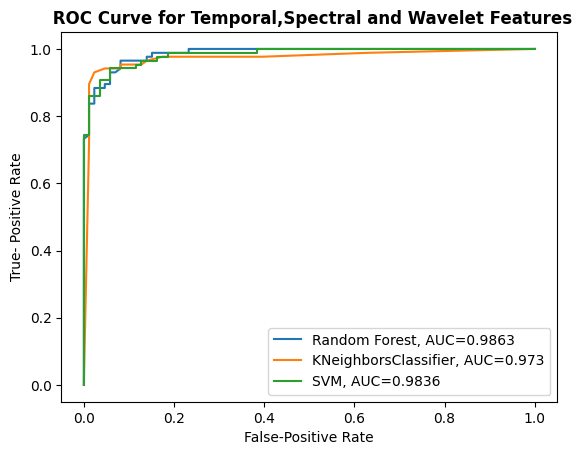

In [ ]:
#fit Random Forest Classifier model and plot ROC curve
# model =  RandomForestClassifier()
# model.fit(nX_train, y_train.ravel())
y_pred = classifier_RF.predict_proba(nX_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#fit gradient boosted model and plot ROC curve
# model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
# model.fit(nX_train, y_train)
y_pred = classifier_knn.predict_proba(nX_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
# model = svm.NuSVC(gamma='auto',probability=True)
# model.fit(nX_train, y_train)
y_pred = classifier_svm.predict_proba(nX_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#add title
plt.title(" ROC Curve for Temporal,Spectral and Wavelet Features" , fontsize = 12 ,fontweight ='bold')
plt.xlabel("False-Positive Rate")
plt.ylabel("True- Positive Rate")


#add legend
plt.legend()

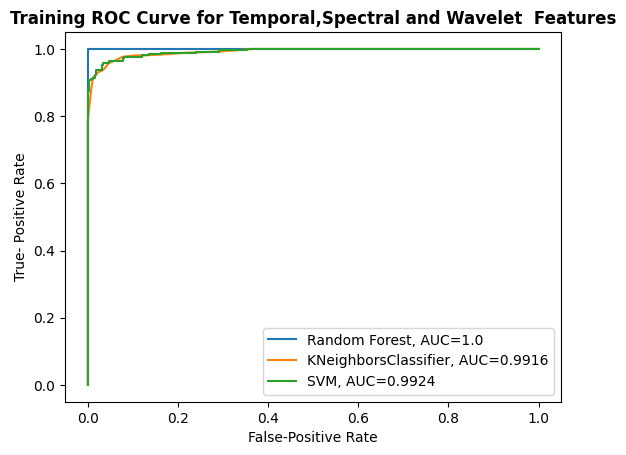

In [ ]:
#fit Random Forest Classifier model and plot ROC curve
# model =  RandomForestClassifier()
# model.fit(nX_train, y_train.ravel())
y_pred = classifier_RF.predict_proba(nX_train)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred)
auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))


#fit gradient boosted model and plot ROC curve
# model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
# model.fit(nX_train, y_train)
y_pred = classifier_knn.predict_proba(nX_train)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred)
auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
# model = svm.NuSVC(gamma='auto',probability=True)
# model.fit(nX_train, y_train)
y_pred = classifier_svm.predict_proba(nX_train)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred)
auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#add title
plt.title("Training ROC Curve for Temporal,Spectral and Wavelet  Features" , fontsize = 12 ,fontweight ='bold')
plt.xlabel("False-Positive Rate")
plt.ylabel("True- Positive Rate")


#add legend
plt.legend()

**SHAP /LIME**

In [ ]:
!pip install lime

In [ ]:
import lime
from lime import lime_tabular
import sklearn.ensemble
from __future__ import print_function
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

In [ ]:
from lime import explanation

In [ ]:
#creating an instance of the lime tabular explainer
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(nX_train), feature_names= x_train_feat.columns,
            class_names=['Covid', 'Normal'], mode='classification')

In [ ]:

nX_test = np.array([i for i in range(168)])

In [ ]:
explanation= lime_explainer.explain_instance(data_row=nX_test,
                                             predict_fn = classifier_knn.predict_proba,
                                             top_labels =2 ,
                                             num_features=x_train_feat.columns)

explanation.show_in_notebook()

In [ ]:
# importing shap
import shap

# print the JS visualization code to the notebook
shap.initjs()

**SHAP TEST FOR RESPONSE**

**Random Forest**

In [ ]:
#Fits Explainer

explainer2=shap.Explainer(classifier_RF.predict, nX_test)

#Calculate SHAP values
shap_values2 =explainer2(nX_test)

Permutation explainer: 173it [01:49,  1.53it/s]


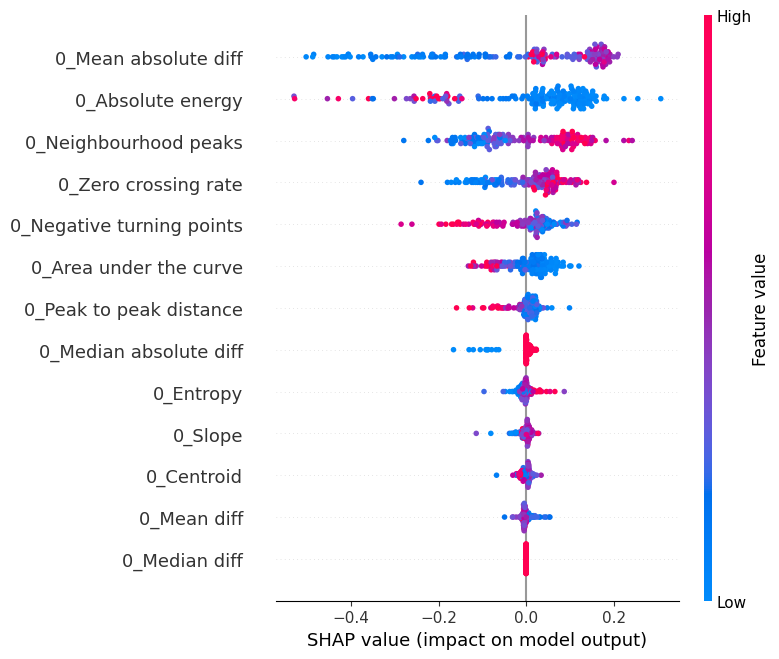

In [ ]:
shap.summary_plot(shap_values2 ,features=nX_test ,feature_names=x_train_feat.columns)

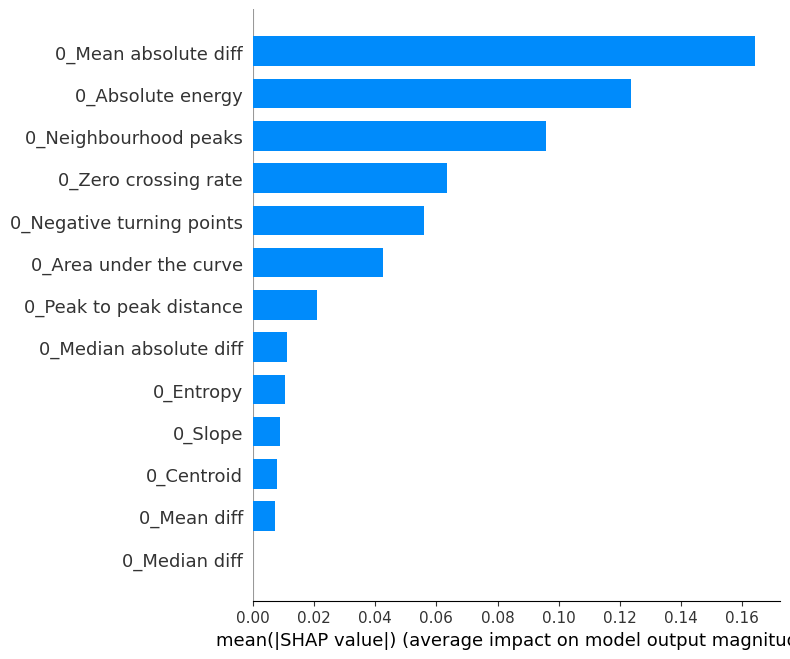

In [ ]:
shap.summary_plot(shap_values2 ,features=nX_test ,feature_names=x_train_feat.columns ,plot_type ='bar')

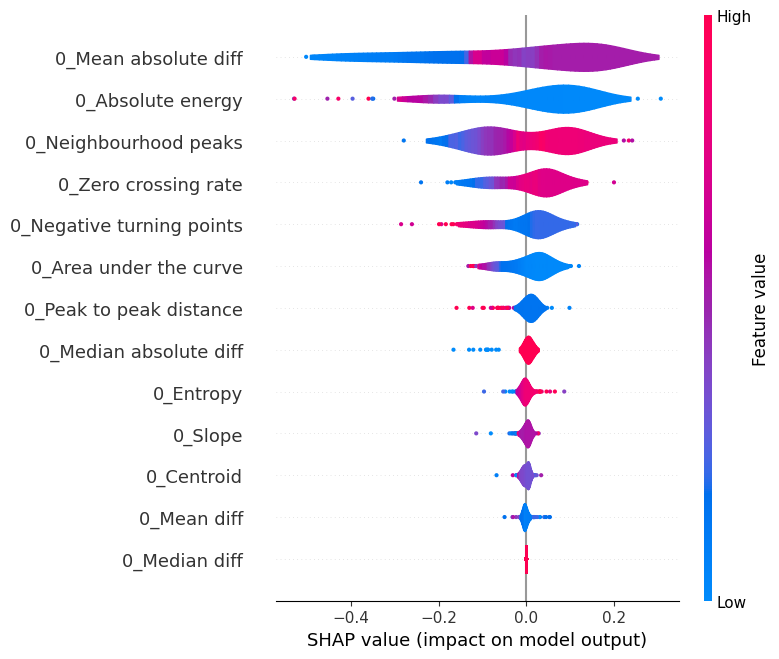

In [ ]:
shap.summary_plot(shap_values2 ,feature_names=x_train_feat.columns ,plot_type ='violin')

**SVM**

In [ ]:
#Fits Explainer

explainer1=shap.Explainer(classifier_svm.predict, nX_test)

#Calculate SHAP values
shap_values1 =explainer1(nX_test)

Permutation explainer: 173it [01:56,  1.33it/s]


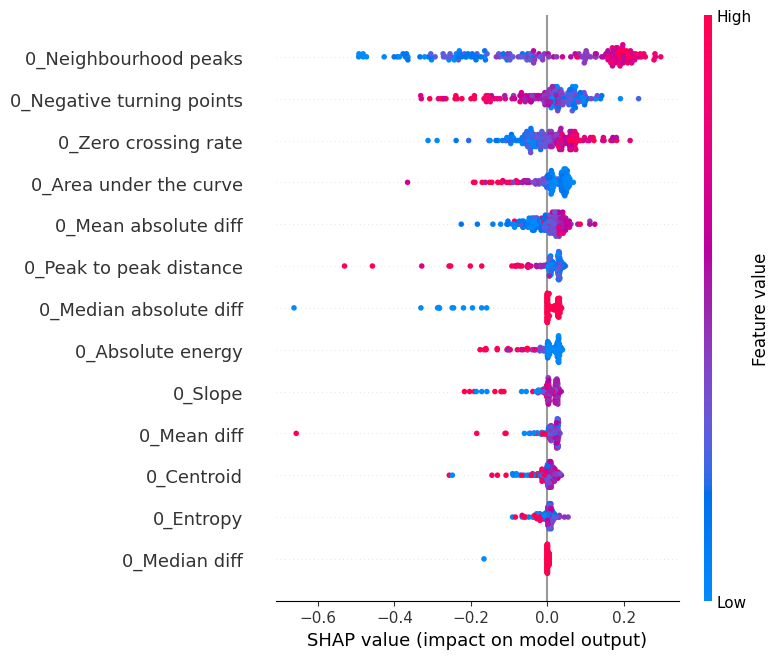

In [ ]:
shap.summary_plot(shap_values1 ,features=nX_test ,feature_names=x_train_feat.columns)

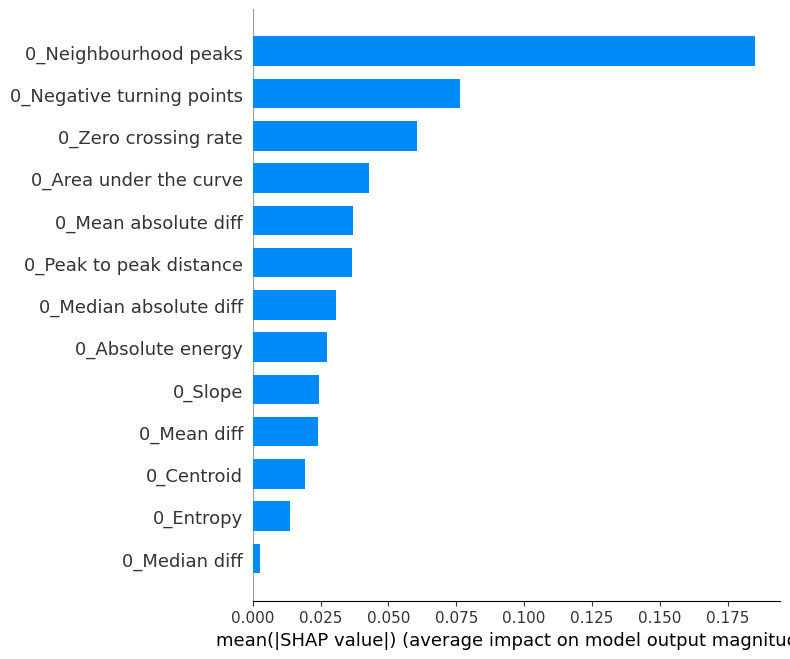

In [ ]:
shap.summary_plot(shap_values1 ,features=nX_test ,feature_names=x_train_feat.columns ,plot_type ='bar')

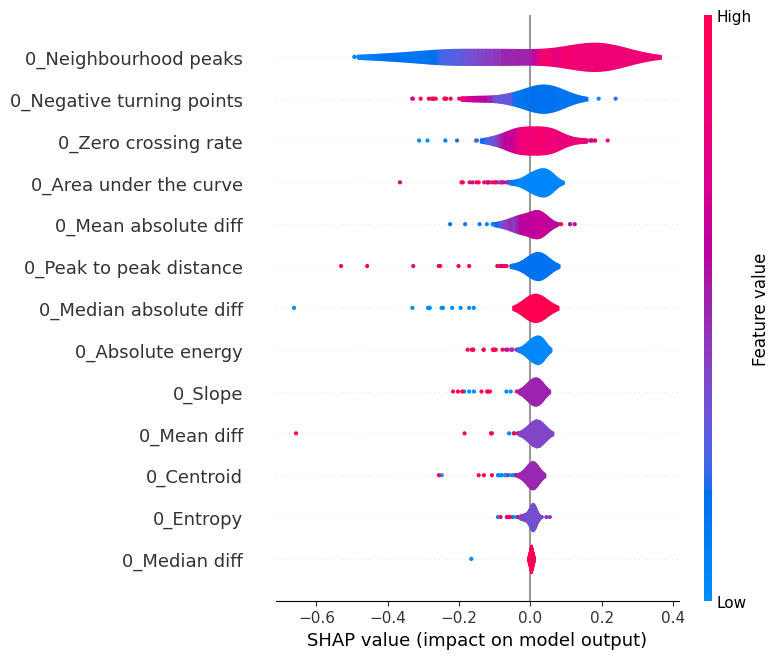

In [ ]:
shap.summary_plot(shap_values1 ,feature_names=x_train_feat.columns ,plot_type ='violin')

**KNN**

In [ ]:
#Fits Explainer

explainer=shap.Explainer(classifier_knn.predict ,nX_test)

#Calculate SHAP values
shap_values =explainer(nX_test)

Permutation explainer: 173it [05:09,  1.85s/it]


In [ ]:
shap_values.output_names


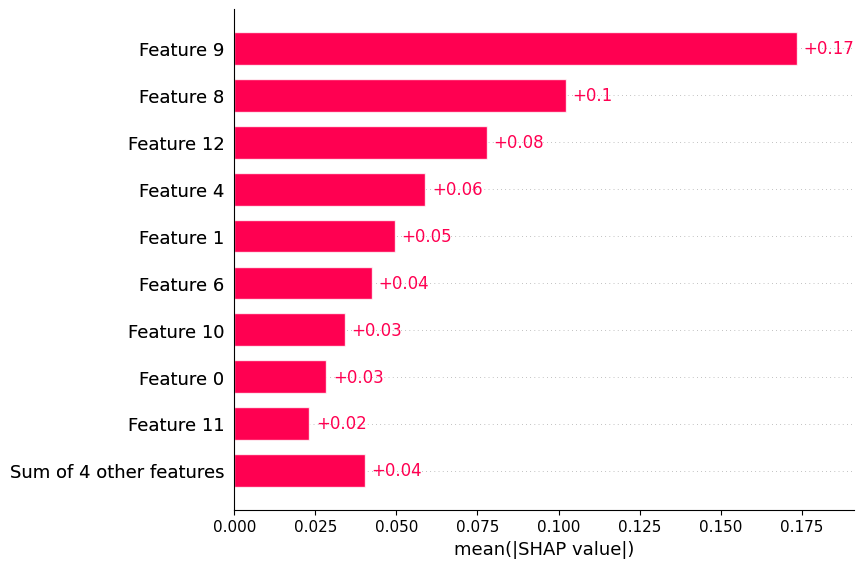

In [ ]:
#Evaluate SHAP values
shap.plots.bar(shap_values  )

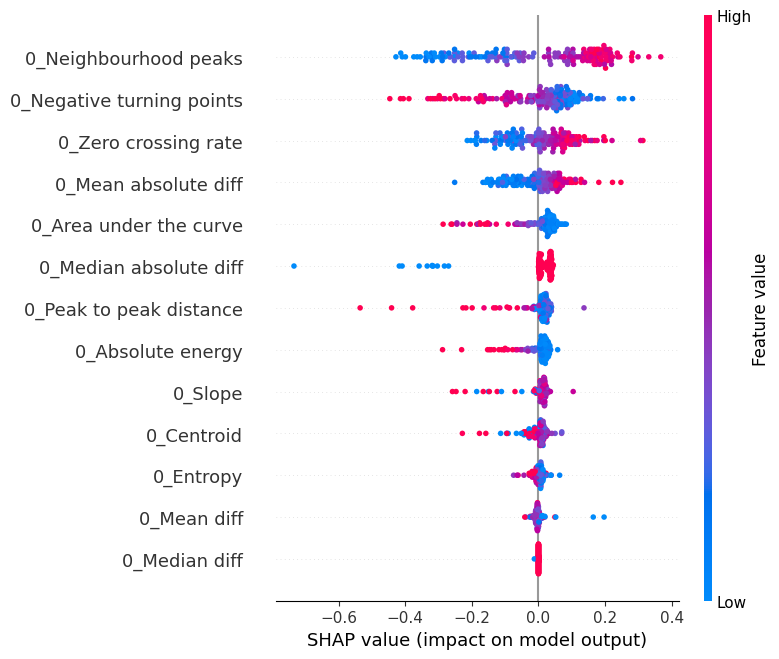

In [ ]:
shap.summary_plot(shap_values ,features=nX_test ,feature_names=x_train_feat.columns)

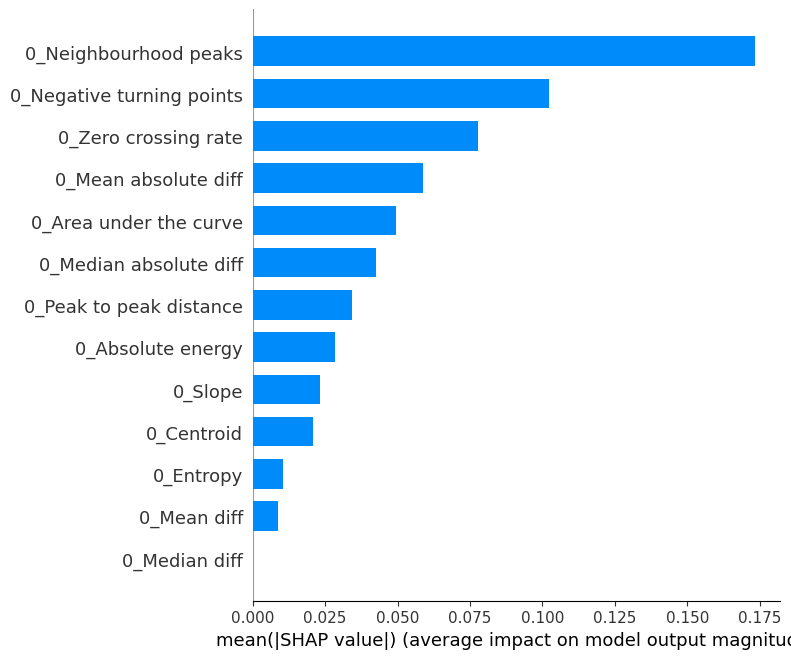

In [ ]:
shap.summary_plot(shap_values ,features=nX_test ,feature_names=x_train_feat.columns ,plot_type ='bar')

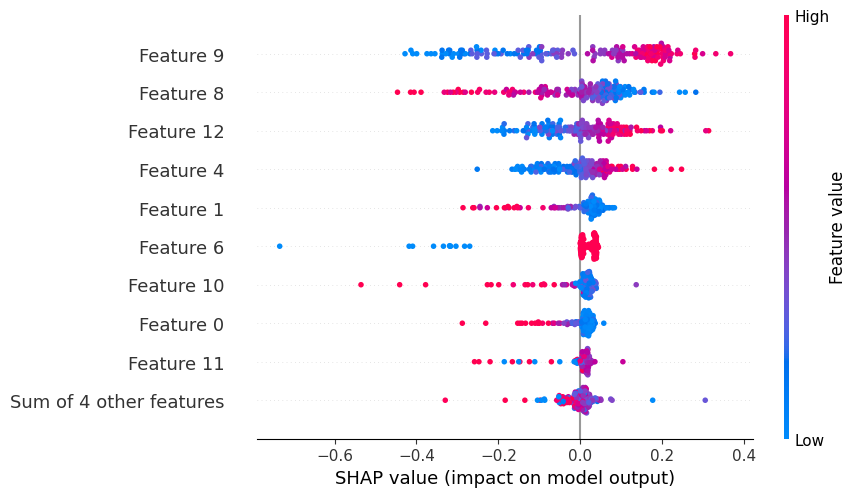

In [ ]:
shap.plots.beeswarm(shap_values)

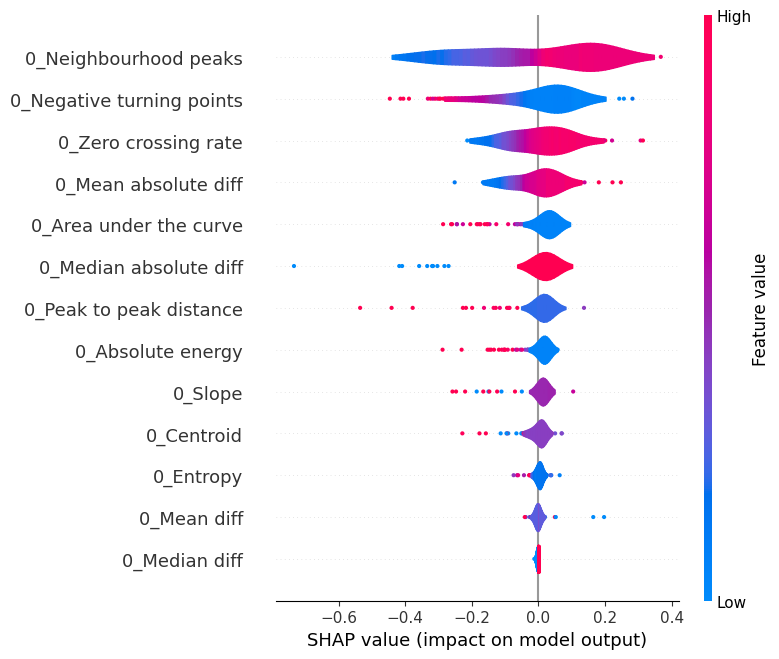

In [ ]:
#shap.summary_plot(shap_values ,plot_type ='violin')
shap.summary_plot(shap_values ,feature_names=x_train_feat.columns ,plot_type ='violin')

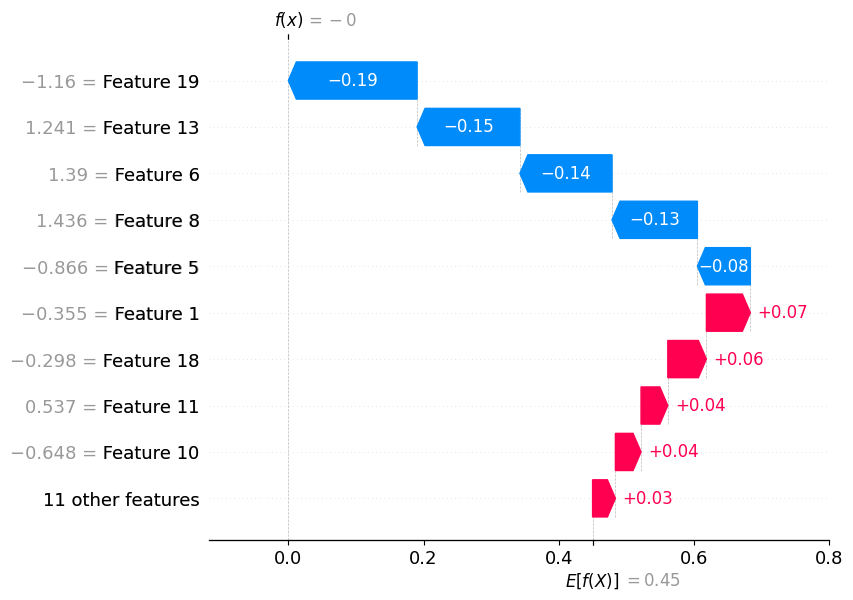

In [ ]:
shap.plots.waterfall(shap_values[0] )

In [ ]:
'''shap.initjs()
shap.force_plot(shap_values ,features=nX_test )'''

In [ ]:
# Get the model explainer object
explainer = shap.KernelExplainer(classifier_knn.predict_proba, X_train)

In [ ]:
# Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X[0,:], matplotlib=True)

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, nX_train, feature_names=x_train_feat.columns, max_display=15)

In [ ]:

# Generate a force plot for this first observation using the derived shap values
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0],X_test )

In [ ]:

# Generate a force plot for this first observation using the derived shap values
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test )

In [ ]:
# instantiating a TreeExplainer object
explainer = shap.TreeExplainer(classifier_svm)

In [ ]:
models = [
          {"name": "Naive Bayes", "clf": GaussianNB()},
          {"name": "logistic regression", "clf": LogisticRegressionCV()},
          {"name": "Decision Tree", "clf": DecisionTreeClassifier()},
          {"name": "Random Forest", "clf": RandomForestClassifier(n_estimators=100)},
          {"name": "Gradient Boosting", "clf": GradientBoostingClassifier(n_estimators=100)},
          {"name": "MLP Classifier", "clf": MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10,10,5,2), max_iter=500, random_state=42)}]
